# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **02/11/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Atividade: K-Means

**Geração aleatória de dados iniciais**

In [6]:
import warnings
warnings.filterwarnings('ignore')

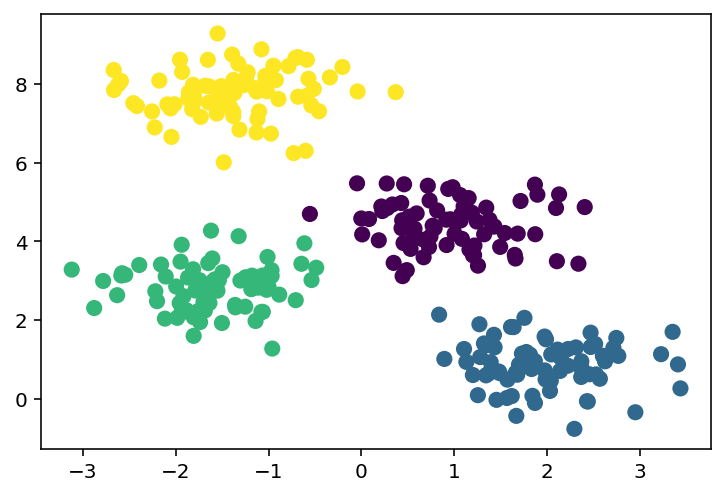

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')


**Implementação**

**TODO:** Implemente o algoritmo do k-means e o pipeline de treinamento e teste para os dados iniciais

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(scaled_x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

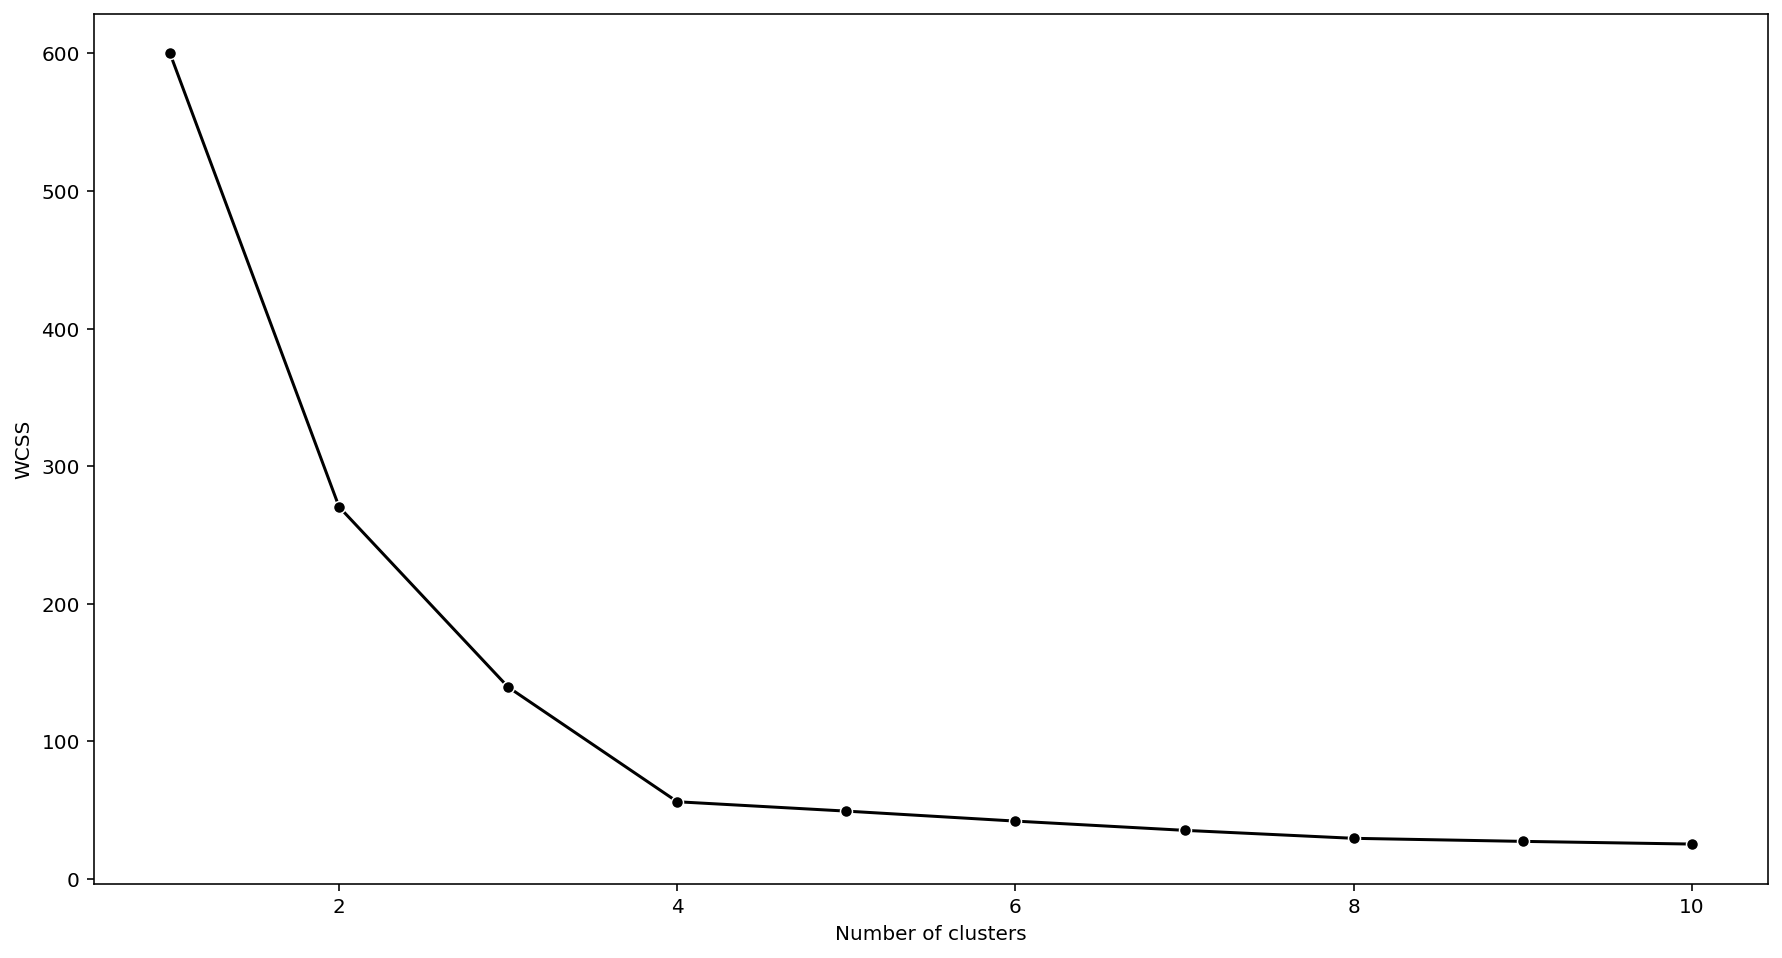

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(range(1, 11), wcss,marker='o',color='black')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

**TODO:** Faça um novo *plot* os dados, considerando:

*   A utilização dos grupos preditos pelo algoritmo como referência (mudança no parâmetro `c` do `plt.scatter`)
*   O plot dos centroides sobre os dados



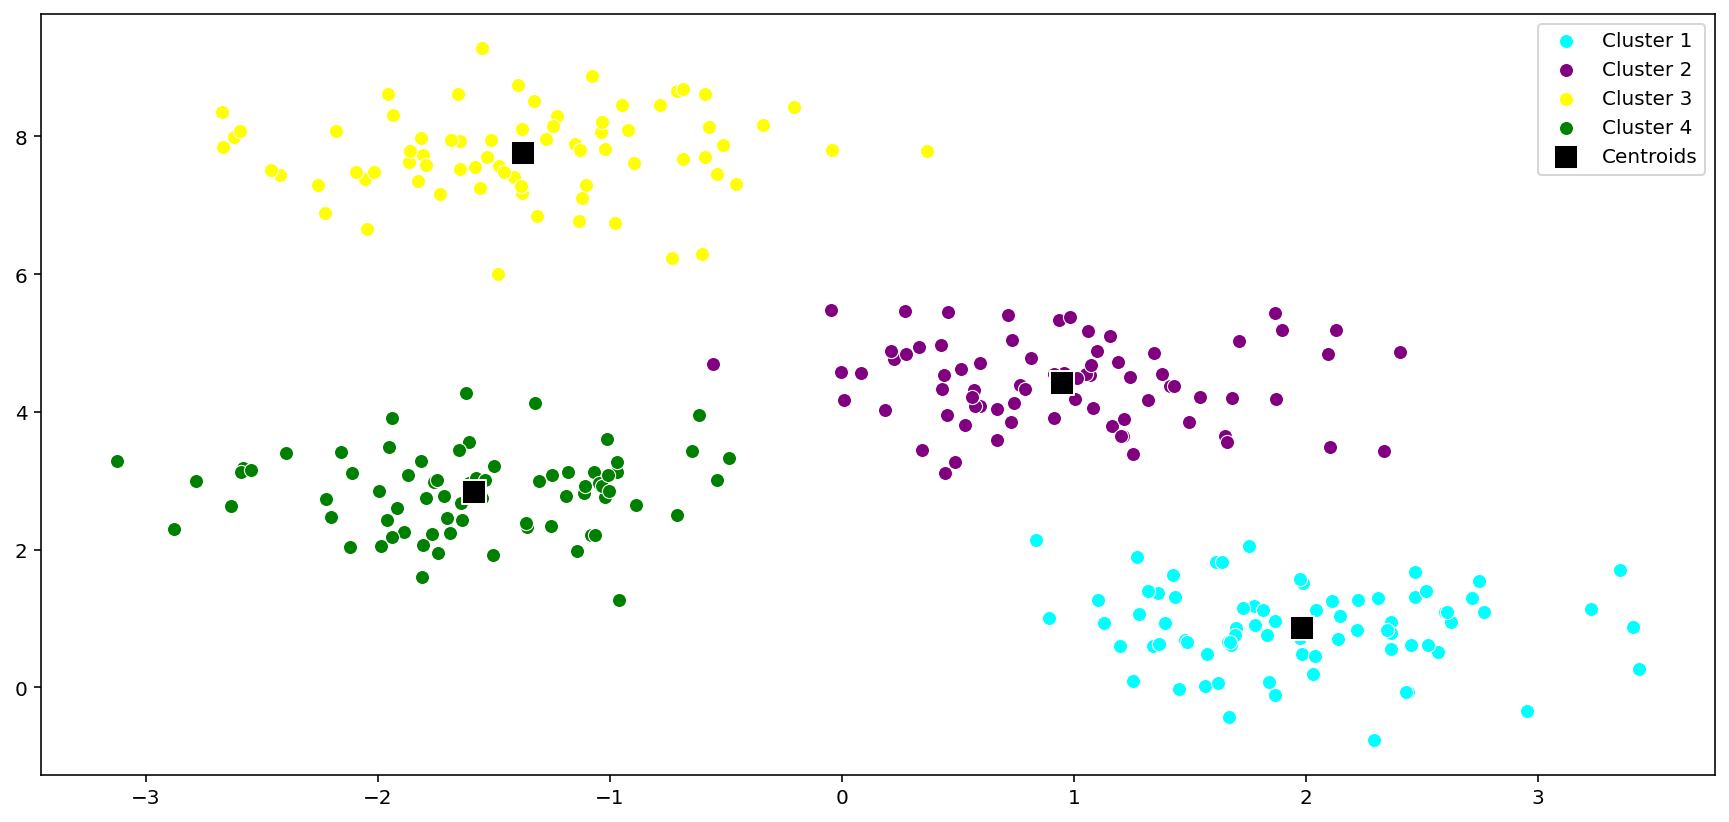

In [12]:
import seaborn as sns

plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'cyan', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'yellow', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroids',s=150,marker=',')

plt.show()

**Aplicação**

Agora, utilize o algoritmo implementado no dataset `digits`

`load_digits`

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
data = digits.data
y = digits.target

samples, features = data.shape

**TODO:** treine o modelo para o dataset digits

In [19]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 30
wcss = []

for i in range(2, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

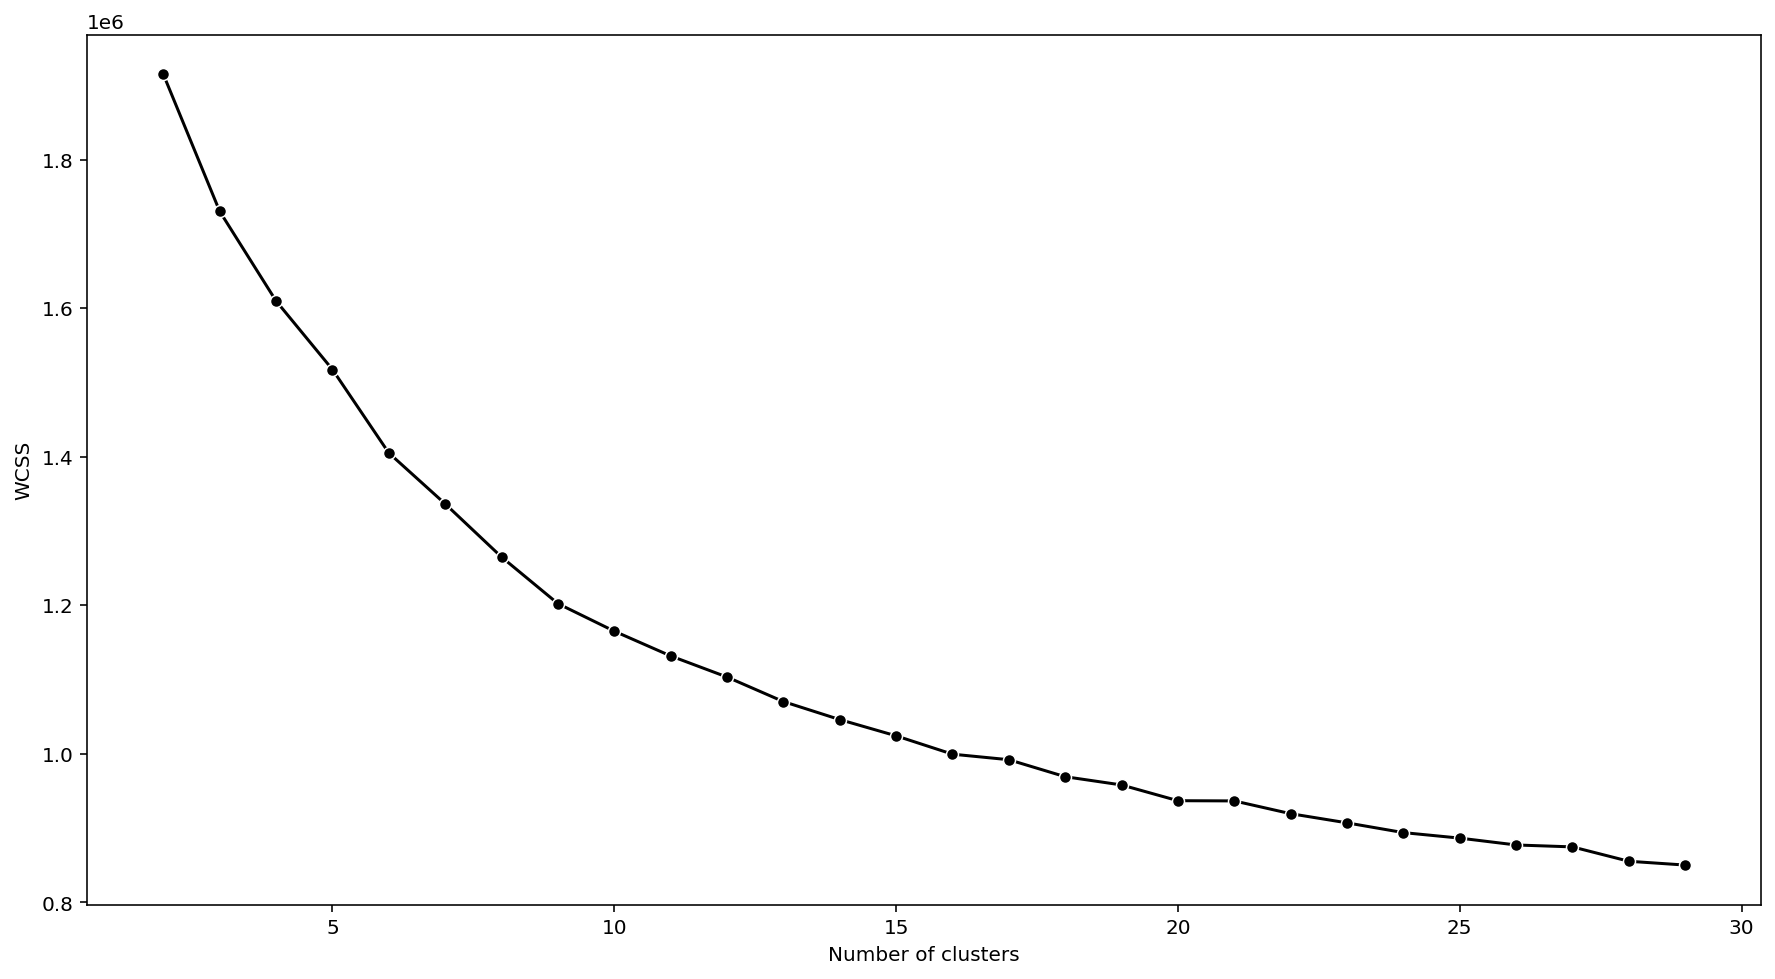

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(range(2, 30), wcss,marker='o',color='black')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

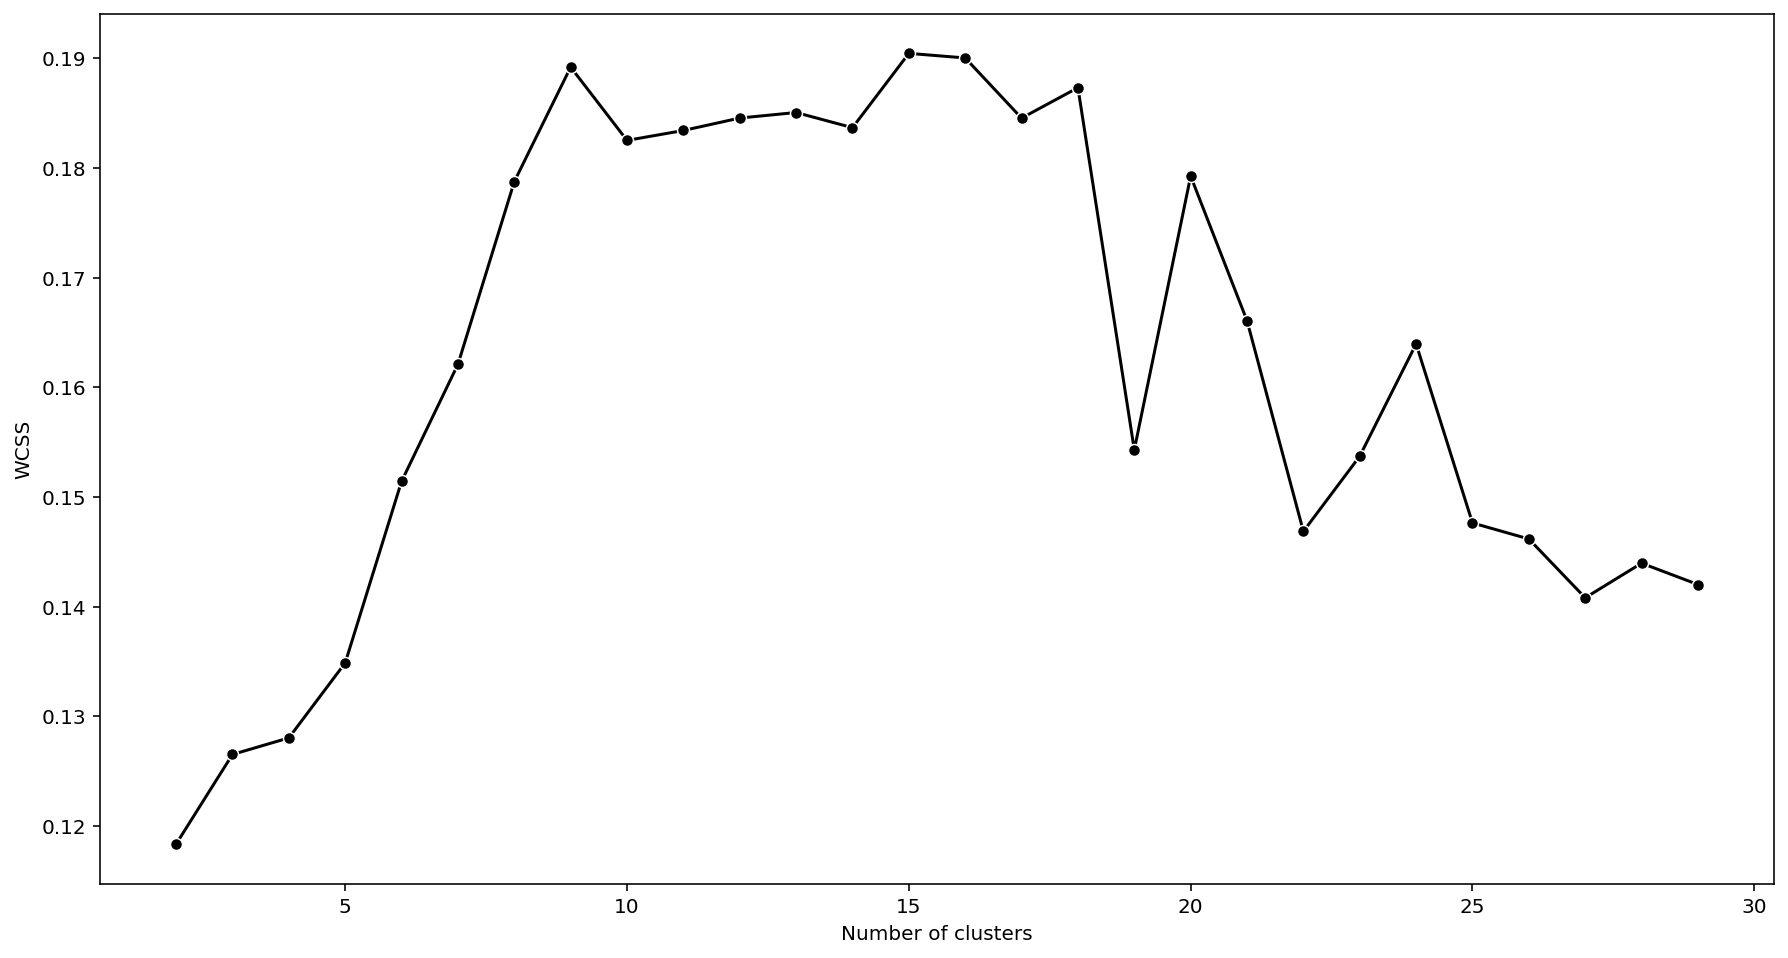

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(range(2, 30), sil,marker='o',color='black')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**TODO:** Faça o *plot* dos centroides obtidos pelo algortimo

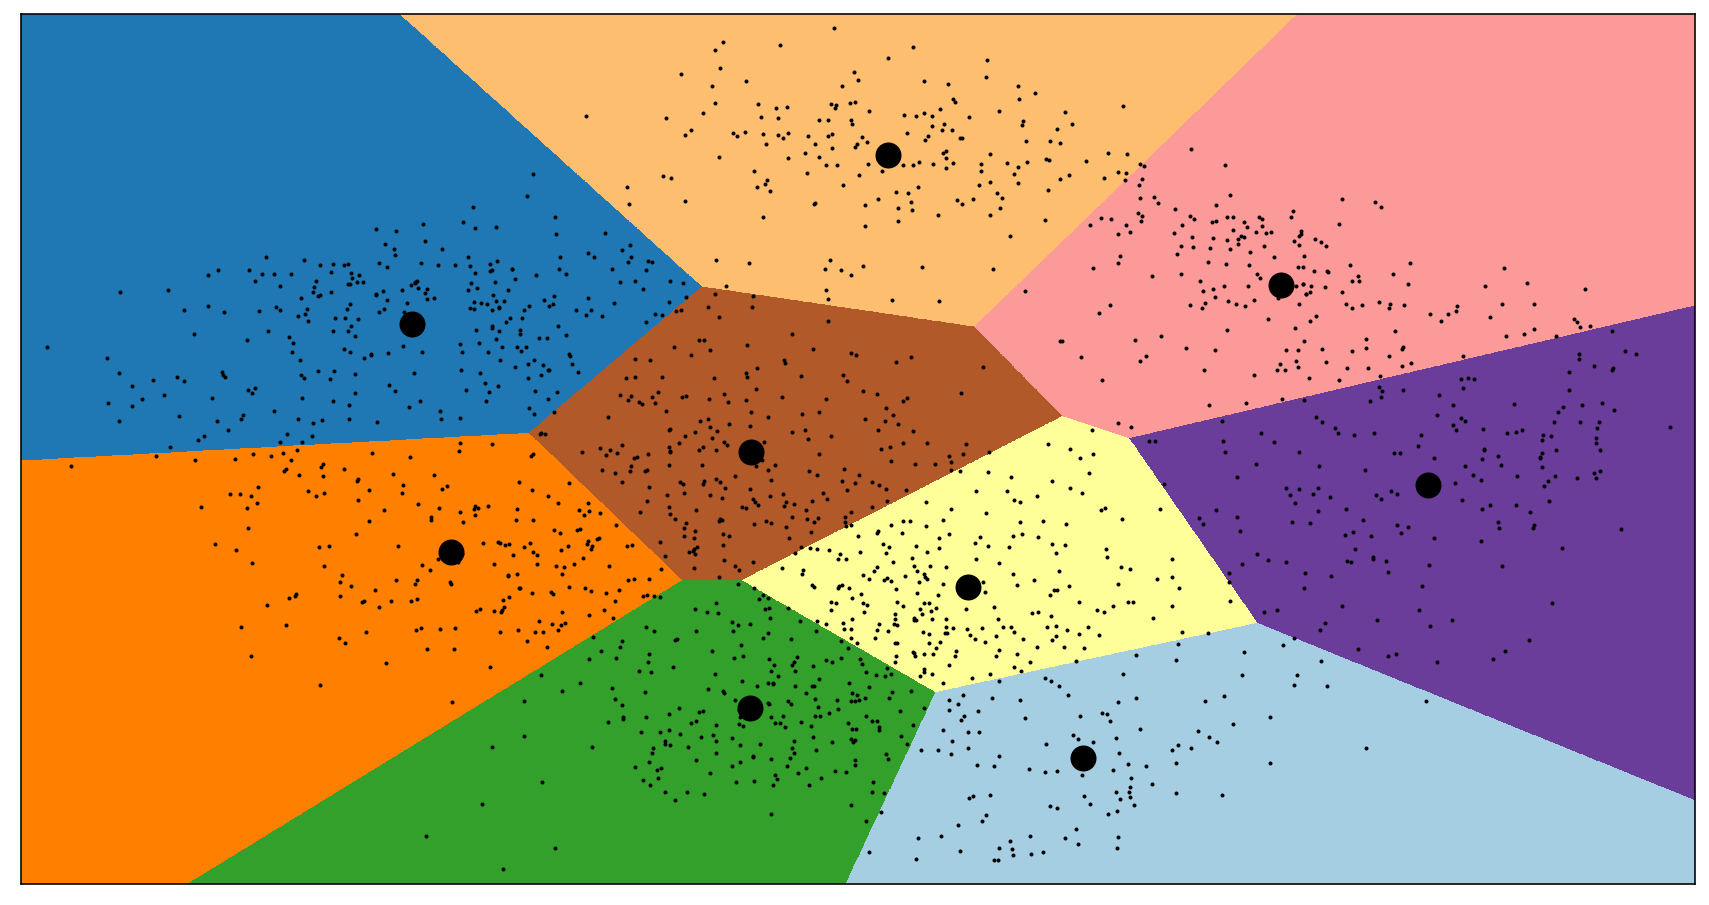

In [24]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=9, n_init=4)
kmeans.fit(reduced_data)

# decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# labels for each point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))
plt.figure(1)
plt.clf()

plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, linewidths=3,
            color="black", zorder=10)


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

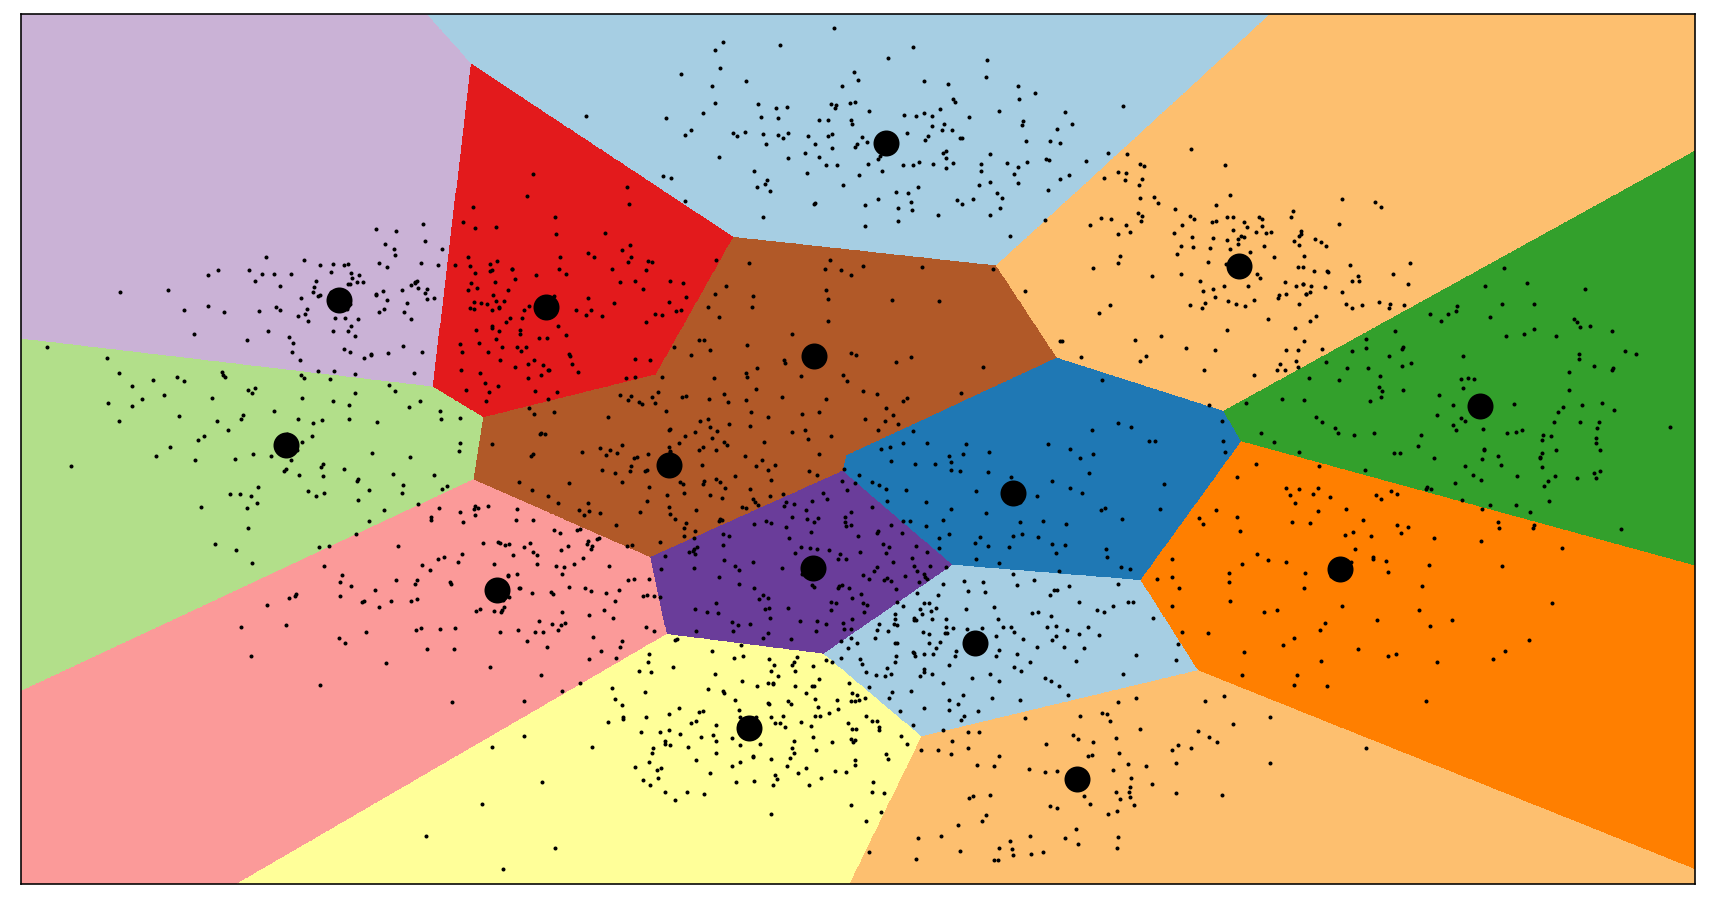

In [25]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=15, n_init=4)
kmeans.fit(reduced_data)

# decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# labels for each point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))
plt.figure(1)
plt.clf()

plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, linewidths=3,
            color="black", zorder=10)


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()